In [20]:
# Explore and clean up the dataset

import pandas as pd

data = pd.read_csv('C:/Users/paakk/Documents/Personal/Projects/data_analysis_portfolio/data/Algerian_forest_fires_dataset_UPDATE.csv', delimiter=',', dtype=str)

# Strip leading and trailing spaces from column names
data.columns = data.columns.str.strip()

# List of columns to convert to numeric
columns_to_convert = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

# Convert the listed columns to numeric, coercing errors to NaN
for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Drop rows with NaN values in any of the listed columns
data = data.dropna(subset=columns_to_convert)

# Convert the 'Classes' column to category type
data['Classes'] = data['Classes'].astype('category')

# Convert date columns to integer type
data['day'] = pd.to_numeric(data['day'], errors='coerce')
data['month'] = pd.to_numeric(data['month'], errors='coerce')
data['year'] = pd.to_numeric(data['year'], errors='coerce')

# Drop rows with NaN values in date columns
data = data.dropna(subset=['day', 'month', 'year'])

# Ensure date columns are integers
data['day'] = data['day'].astype(int)
data['month'] = data['month'].astype(int)
data['year'] = data['year'].astype(int)

# Combine day, month, year into a single date column
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# Optionally drop the individual day, month, year columns if they are no longer needed
data = data.drop(columns=['day', 'month', 'year'])

# Print the DataFrame to verify changes
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  243 non-null    int64         
 1   RH           243 non-null    int64         
 2   Ws           243 non-null    int64         
 3   Rain         243 non-null    float64       
 4   FFMC         243 non-null    float64       
 5   DMC          243 non-null    float64       
 6   DC           243 non-null    float64       
 7   ISI          243 non-null    float64       
 8   BUI          243 non-null    float64       
 9   FWI          243 non-null    float64       
 10  Classes      243 non-null    category      
 11  date         243 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(7), int64(3)
memory usage: 23.4 KB
None
   Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI      Classes  \
0           29  57  18   0.0  65.7  3.4   7.6  1.

### Steps

1. Loaded data Algerian_forest_fires_dataset_UPDATE.csv from data folder
2. Cleaned up the columns by removing trailing spaces from the column names
3. Edited column data types to match data accordingly
4. In case of ValueErrors the data is marked as NaN and later rows including none values are removed
5. Combined day, month and year columns into a separate date column
6. Printed basic information on the edited dataset

### Findings 

- No NaN values left in the dataset
- Values now in accurate format and looking clean

### Notes

- Set data format initially into str after noticing the original data formats needed fixing, to ensure the data is in predictable format before cleaning
- Most likely the data was in str format initially, but this ensures I know what I am working with

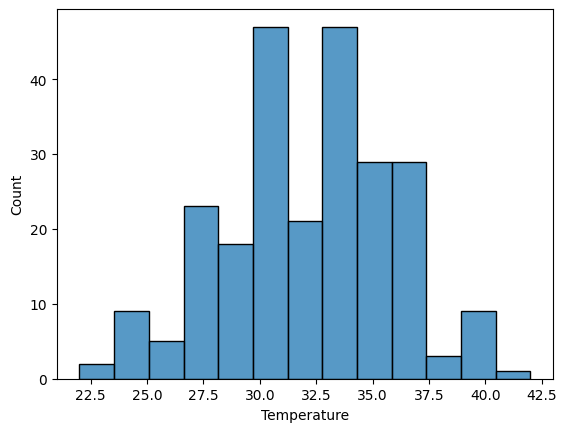

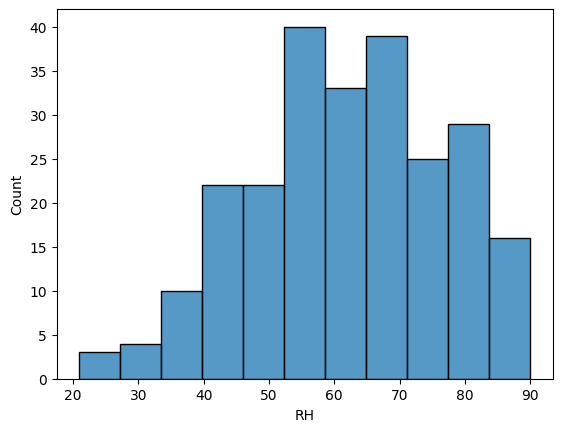

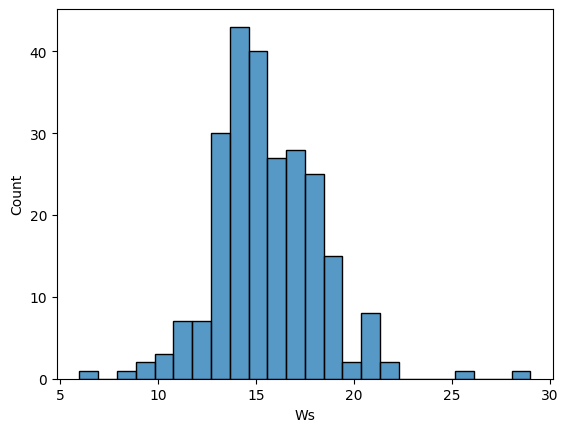

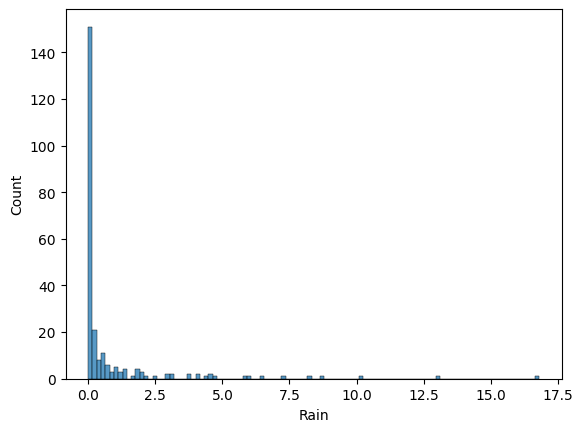

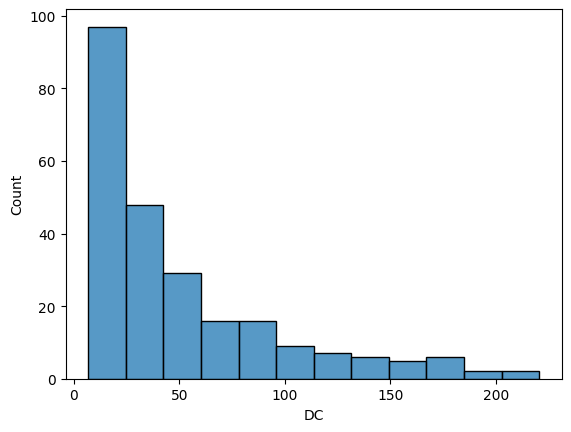

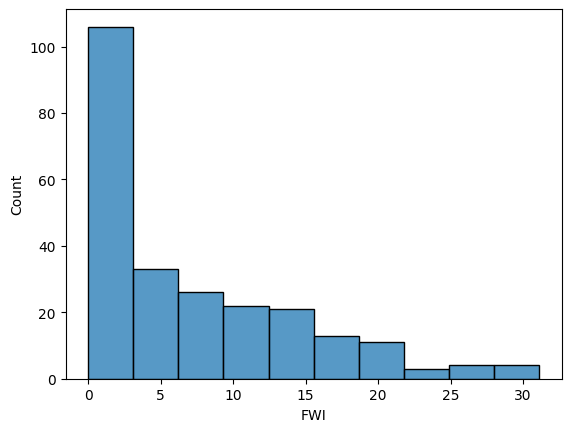

In [21]:
# Perform exploratory data analysis
# Histograms on columns of interest

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['Temperature'])
plt.show()

sns.histplot(data['RH'])
plt.show()

sns.histplot(data['Ws'])
plt.show()

sns.histplot(data['Rain'])
plt.show()

sns.histplot(data['DC'])
plt.show()

sns.histplot(data['FWI'])
plt.show()

### Steps

1. Chose a few columns of interest to see how the data is distributed
2. Draw basic histograms to see the counts of each value for the columns

### Findings

- Rain seems to be very limited in this area
- Wind speed seems normally distributed, similar to temperature and relative humidity
- Indexes used seems to mostly contain lower small values

### Notes

- Did not include all columns since I am going to be performing more precise analysis later on
- Mostly focused on spotting any outliers in columns of interest

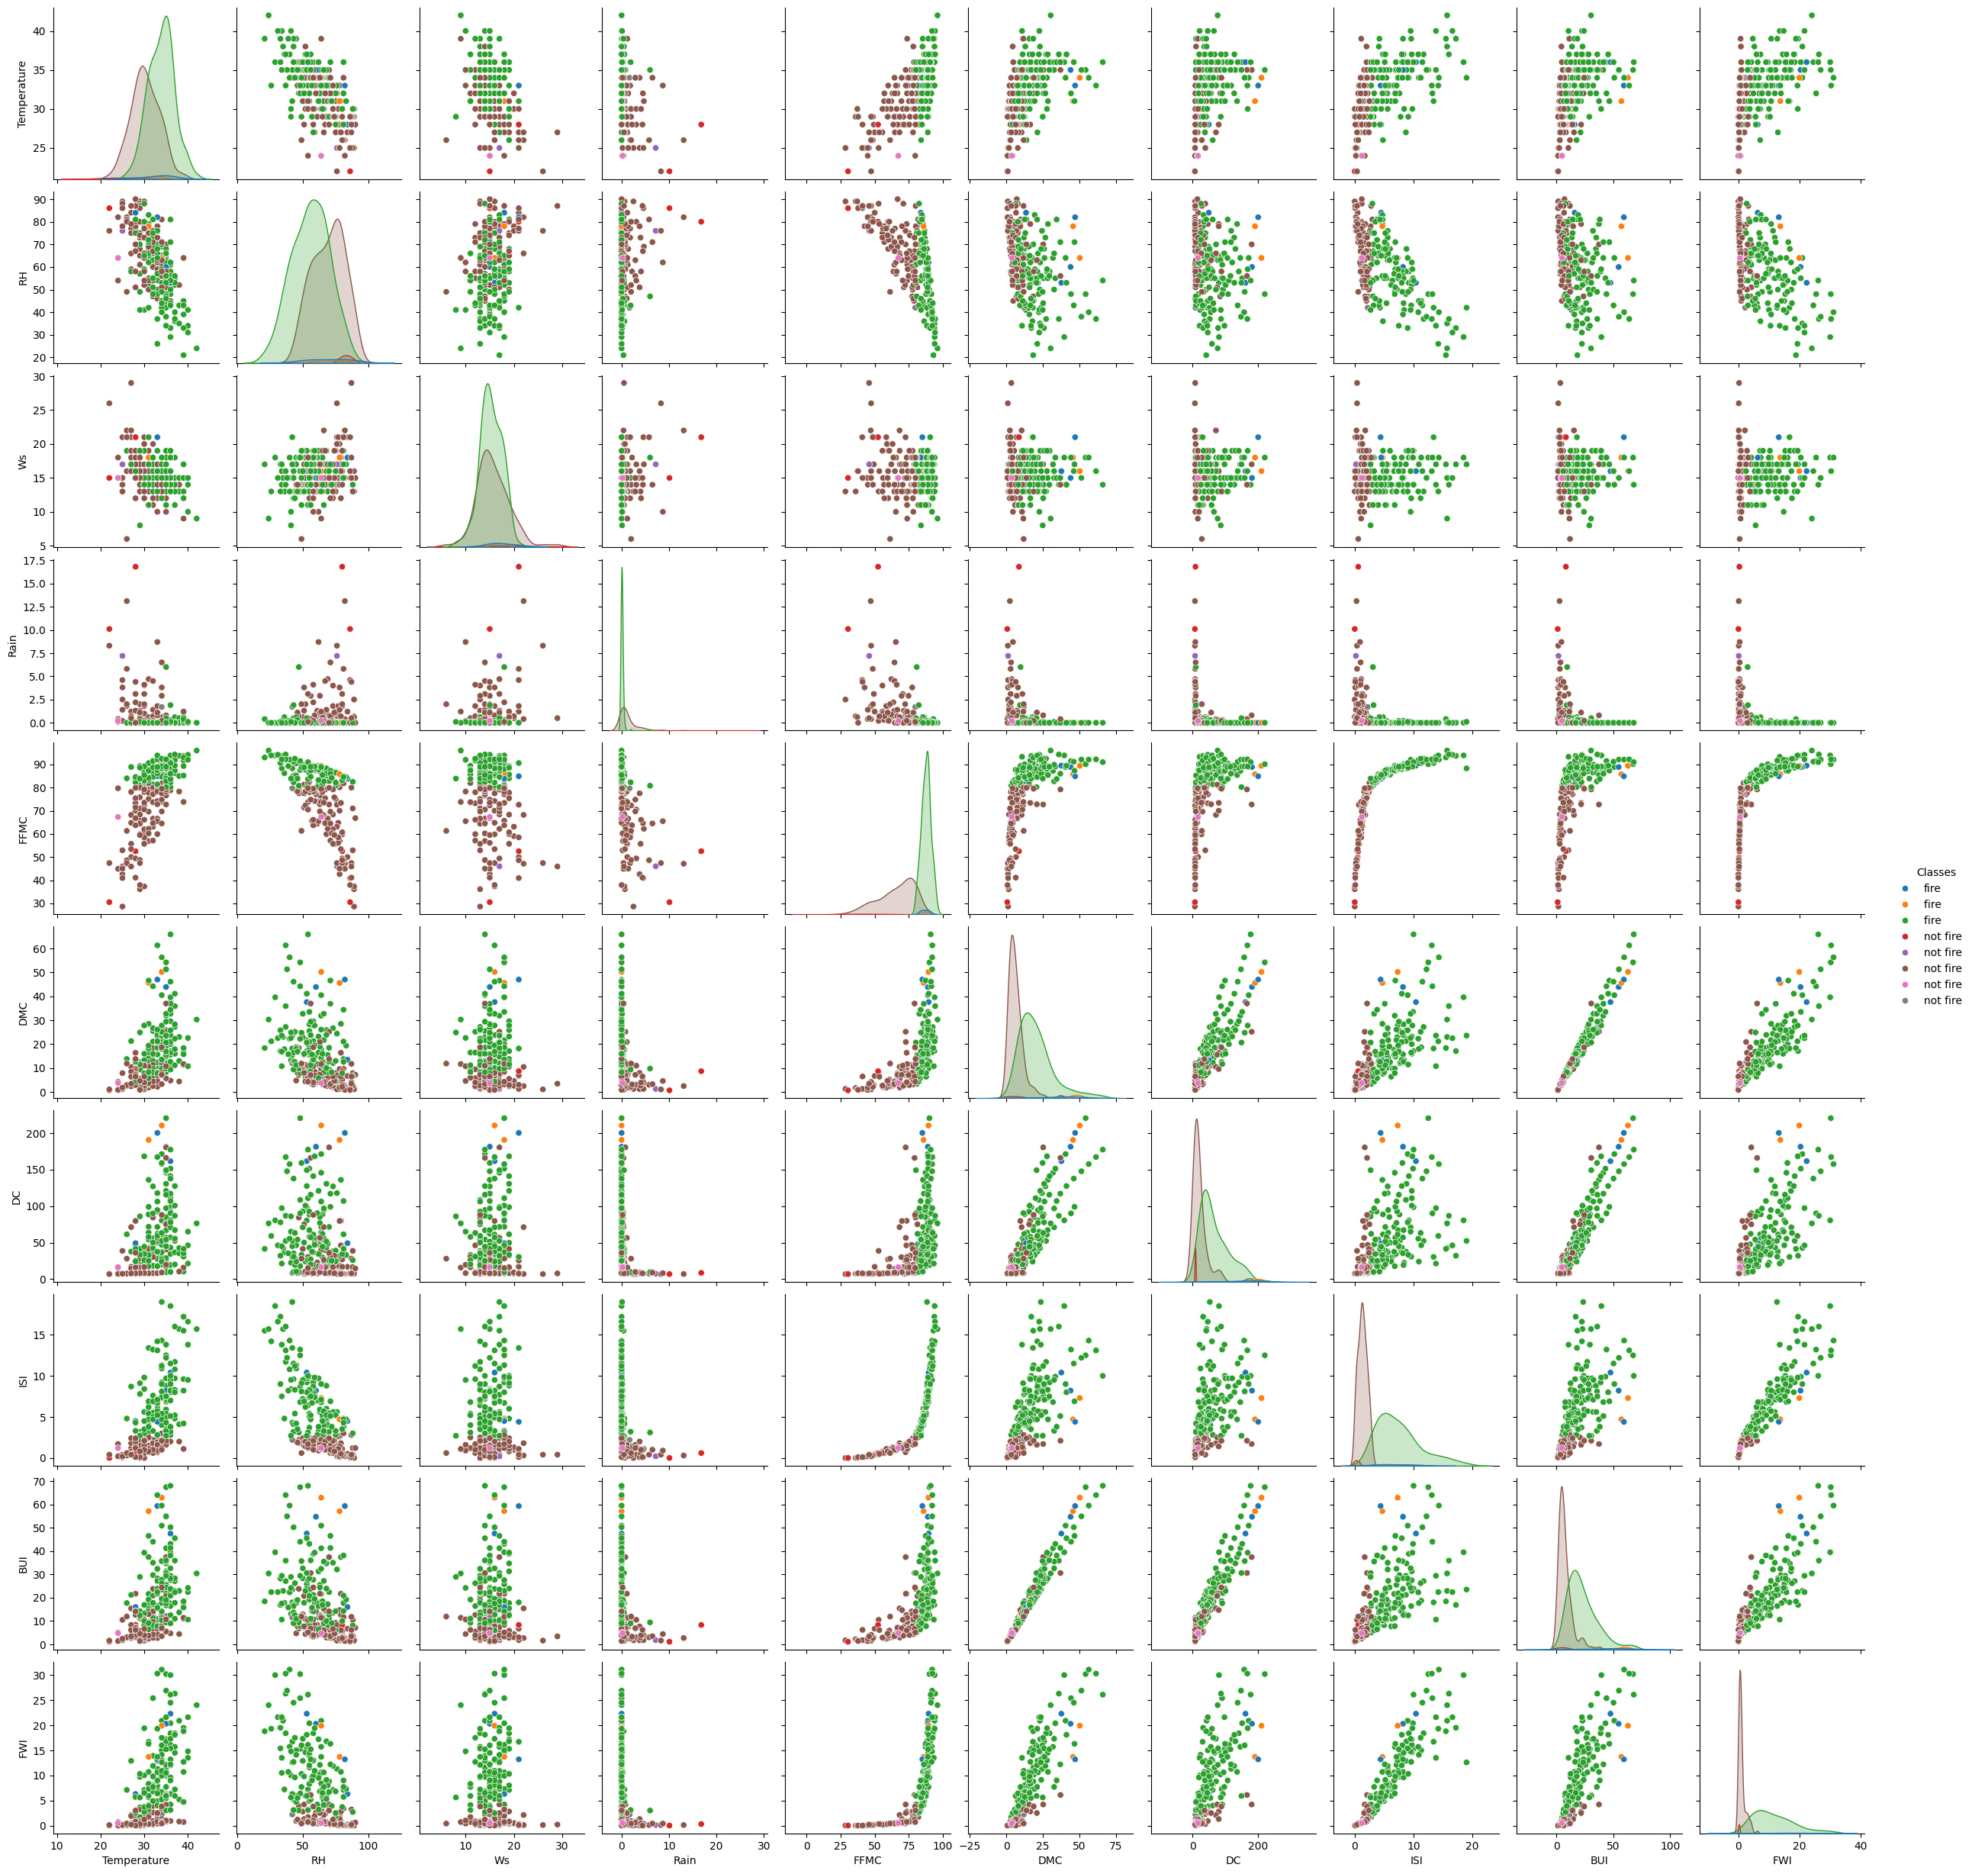

In [22]:
# Create exploratory correlation matrix to investigate data

columns_for_plotting = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

sns.pairplot(data[columns_for_plotting], hue='Classes')

plt.show()


### Steps

1. Created exploratory correlation matrix style pairplot of the columns, which can be analysed further later on

### Findings

- Multiple columns can clearly be used to separate no fire and fire classes from each other
- Indexes seem to give more precise correlations
- Multiple correlations worthy of exploring further, personally interested looking more into the natural measurements of temp, wind and rain in predicting forest fires
- There seems to still be some data cleaning needed in the Classes column since there are multiple classes on no fire and fire

### Notes